# Machine Learning - Supervised Learning
## Unit 5. Decision & Regression trees
### Lecturer: Tai Le Quy
30.8.2023

Thank Prof. Dr. Christian Müller-Kett for the code

## 1. Random Forest

In this tutorial we will demonstrate an example of Random Forest model.

In [1]:
# %% load packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [2]:
#Load the dataset
#Dataset contains information concerning whether the walker has taken their walk
#(Label=1) or not (Label=0) for the 52 Sundays in one year

dataset = pd.read_csv('takingawalk_dataset.csv', sep=';')
print(dataset.head())

   Week Outlook Humidity Wind  Label
0     1   Rainy     High  Yes      0
1     2   Sunny   Normal   No      1
2     3   Sunny   Normal  Yes      1
3     4   Sunny     High  Yes      0
4     5   Rainy   Normal  Yes      0


In [3]:
# remove the “Week” feature, as it contains 52 unique values that do not add any 
#information to the classifier.
X = dataset.drop(columns=['Label', 'Week'])
y = dataset['Label']
X = pd.get_dummies(X)
print(X.columns)

Index(['Outlook_Rainy', 'Outlook_Sunny', 'Humidity_High', 'Humidity_Normal',
       'Wind_No', 'Wind_Yes'],
      dtype='object')


In [4]:
#We divide the dataset into the training set and the testing set, using 30 percent of the
#data to test the model after training. Furthermore, we set the parameter shuffle=True.
#By doing this, we want to make sure that we are not pulling our training and testing
#dataset from just one season of the year. Rather, the two partitions are drawn from
#observations across the entire year.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
#random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. 
#If you don't set a seed, it is different each time.

In [5]:
#we initialize and train a random forest classifier. The random forest will consist of
#100 decision trees, each limited to a maximum depth of three levels. With the help of
#the trained classifier, we can generate predictions on the test set and output the confusion
#matrix for further evaluation

clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  1]
 [ 0  5]]


In [6]:
accuracy_score(y_test, y_pred)

0.9375

In [7]:
#The feature_importances_
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print('Feature Scores:')
print(feature_scores)

Feature Scores:
Humidity_Normal    0.193512
Outlook_Sunny      0.192283
Humidity_High      0.168927
Wind_No            0.151238
Outlook_Rainy      0.147944
Wind_Yes           0.146097
dtype: float64


In [8]:
#Print trees
for i in clf.estimators_:
    print(i)

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)
DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1273642419)
DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1935803228)
DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=787846414)
DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=996406378)
DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1201263687)
DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=423734972)
DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=415968276)
DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=670094950)
DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1914837113)
DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=

Tree  0 :


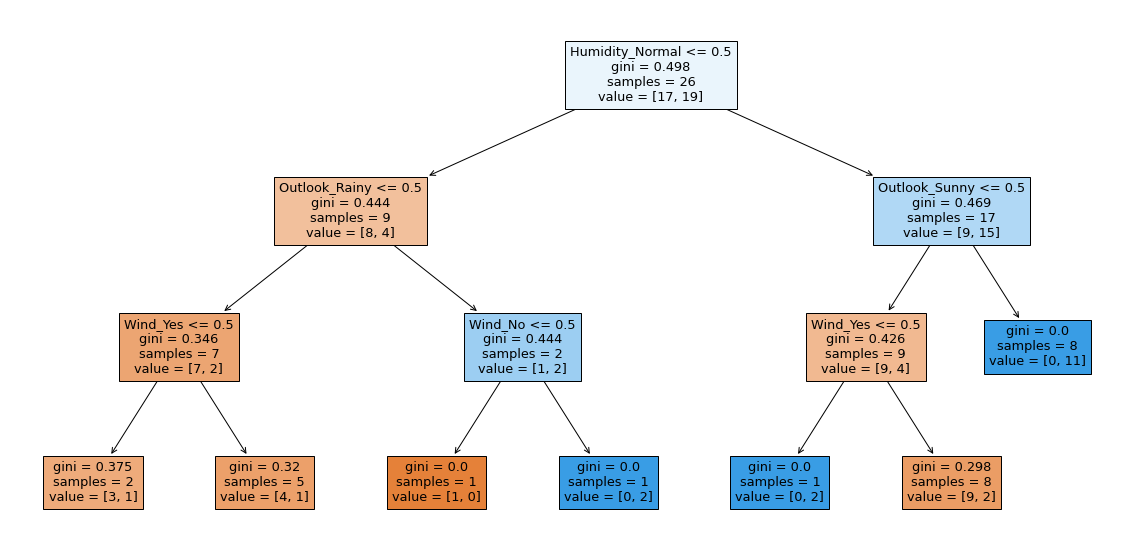

Tree  1 :


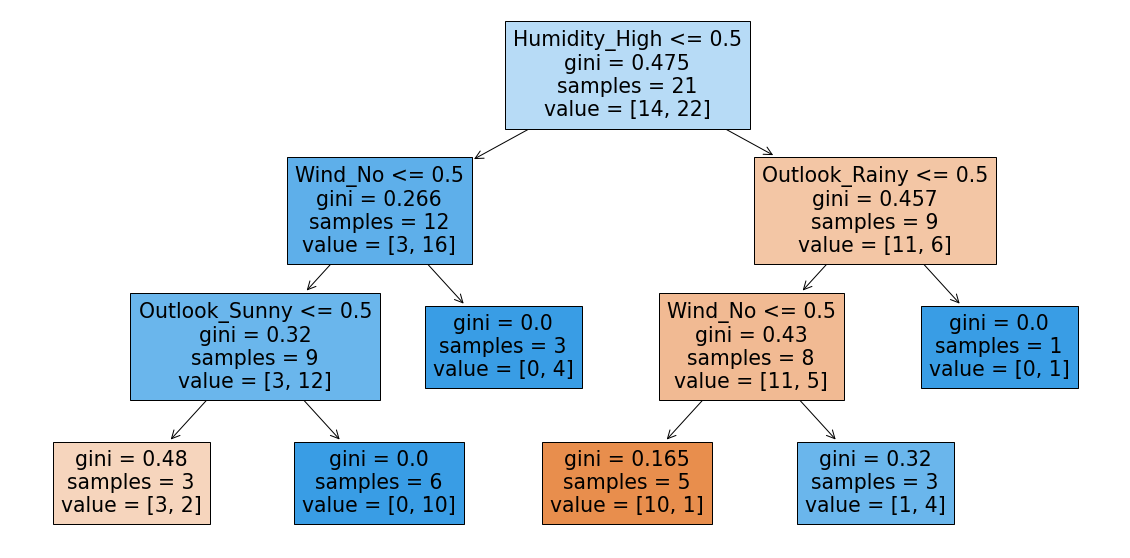

Tree  2 :


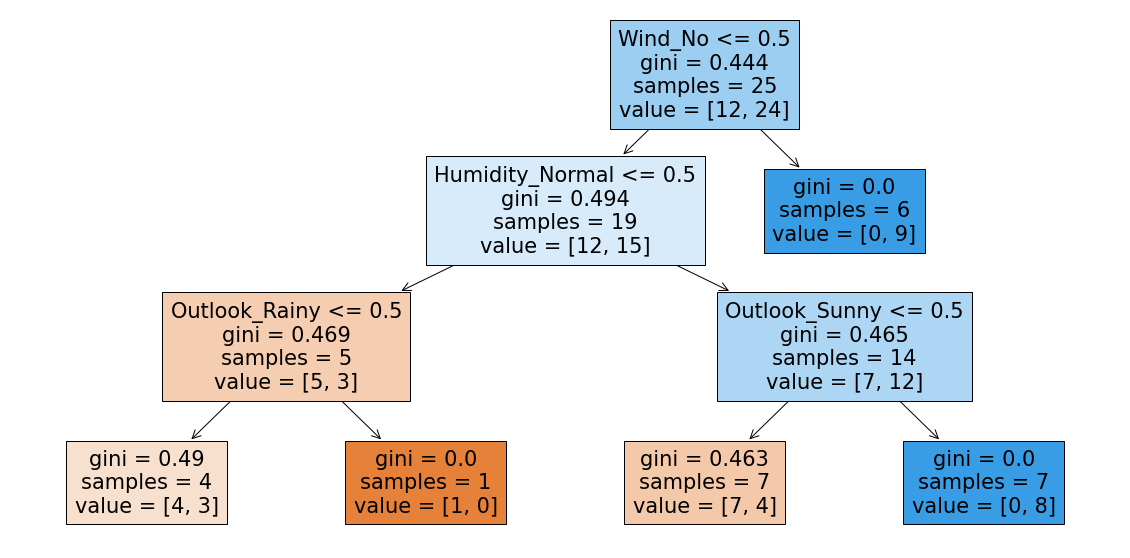

Tree  3 :


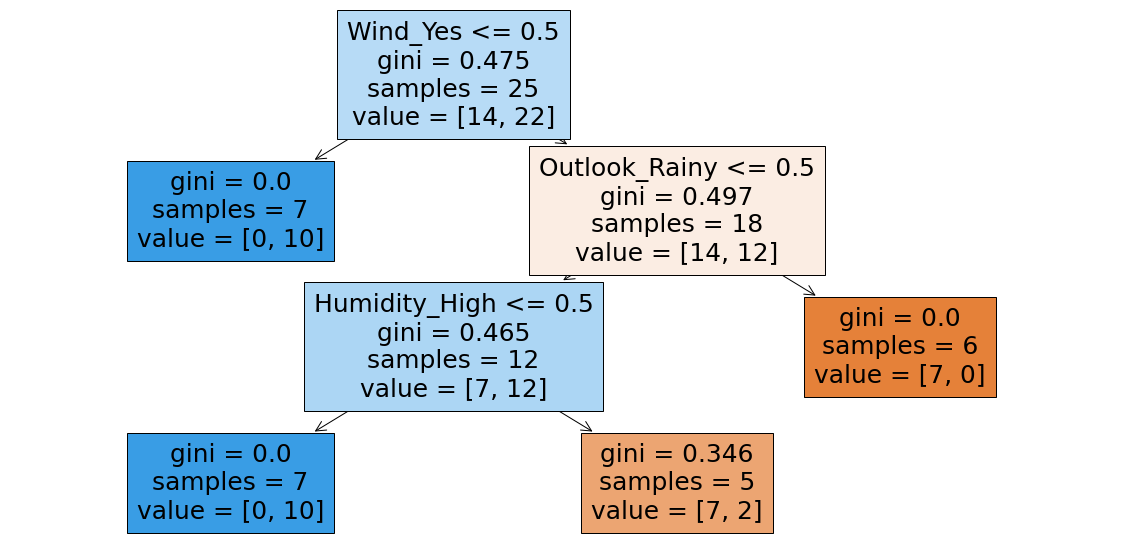

Tree  4 :


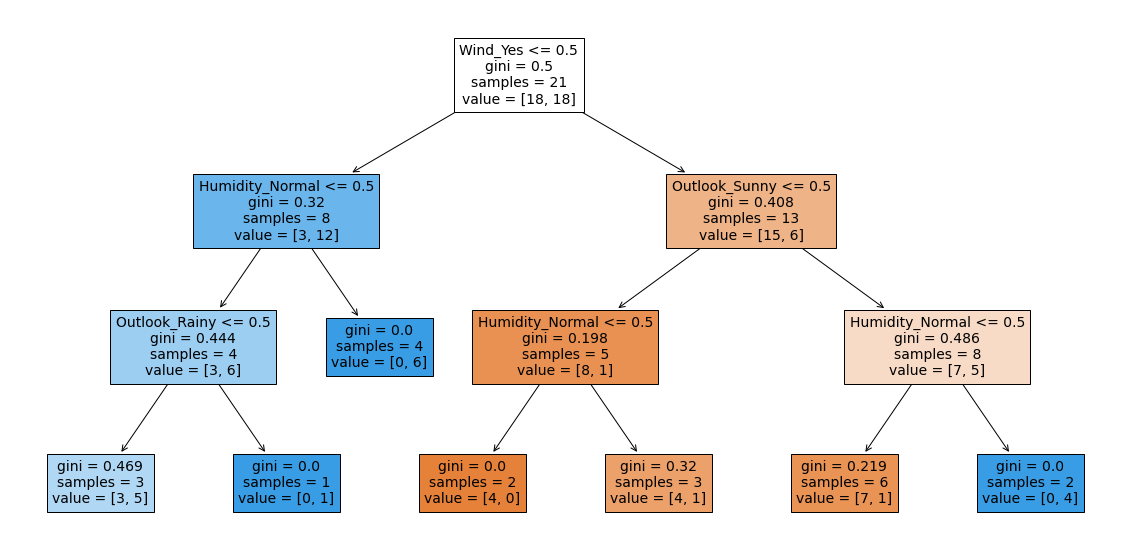

In [9]:
#Plot the decision tree
import matplotlib.pyplot as plt #Library for plot
n_estimators=100
for i in range(5):
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf.estimators_[i], feature_names=X.columns, filled=True)
    filename = "RF-tree-"+str(i)+".pdf"
    plt.savefig(filename,bbox_inches='tight')
    print("Tree ", i,":")
    plt.show()

In [10]:
#Summary
print("Summary")
print(classification_report(y_test, y_pred))

Summary
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



## 2. Gradient Boosting

In [11]:
# Gradient Boosting

# %% load packages
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
# %% load dataset and print 1st five rows
dataset = pd.read_csv('takingawalk_dataset.csv', sep=';')
print(dataset.head())

   Week Outlook Humidity Wind  Label
0     1   Rainy     High  Yes      0
1     2   Sunny   Normal   No      1
2     3   Sunny   Normal  Yes      1
3     4   Sunny     High  Yes      0
4     5   Rainy   Normal  Yes      0


In [13]:
# %% prepare the data
X = dataset.drop(columns=['Label', 'Week'])
y = dataset['Label']
X = pd.get_dummies(X)
print(X.columns)

Index(['Outlook_Rainy', 'Outlook_Sunny', 'Humidity_High', 'Humidity_Normal',
       'Wind_No', 'Wind_Yes'],
      dtype='object')


In [14]:
# %% split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.3, shuffle=True, random_state=42)

In [15]:
# %% specify the classifier to be trained
clf = GradientBoostingClassifier(n_estimators=100,
    max_depth=3, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [16]:
# %% use the model to predict values
y_pred = clf.predict(X_test)

In [17]:
# %% print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  1]
 [ 0  5]]


In [18]:
# %% print accuracy
accuracy_score(y_test, y_pred)

0.9375

In [19]:
# %% extract feature importances
feature_scores = pd.Series(clf.feature_importances_,
    index=X_train.columns).sort_values(ascending=False)
print('Feature Scores:')
print(feature_scores)

Feature Scores:
Wind_No            0.196437
Outlook_Rainy      0.188463
Outlook_Sunny      0.187039
Wind_Yes           0.185786
Humidity_Normal    0.129333
Humidity_High      0.112943
dtype: float64


In [23]:
#Summary
print("Summary")
print(classification_report(y_test, y_pred))

Summary
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16



In [20]:
#Print trees
for i in clf.estimators_:
    print(i)

[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x1DA8F145D08)]
[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x1DA8F145D08)]
[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x1DA8F145D08)]
[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x1DA8F145D08)]
[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x1DA8F145D08)]
[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x1DA8F145D08)]
[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x1DA8F145D08)]
[DecisionTreeRegressor(criterion='

Tree  0 :


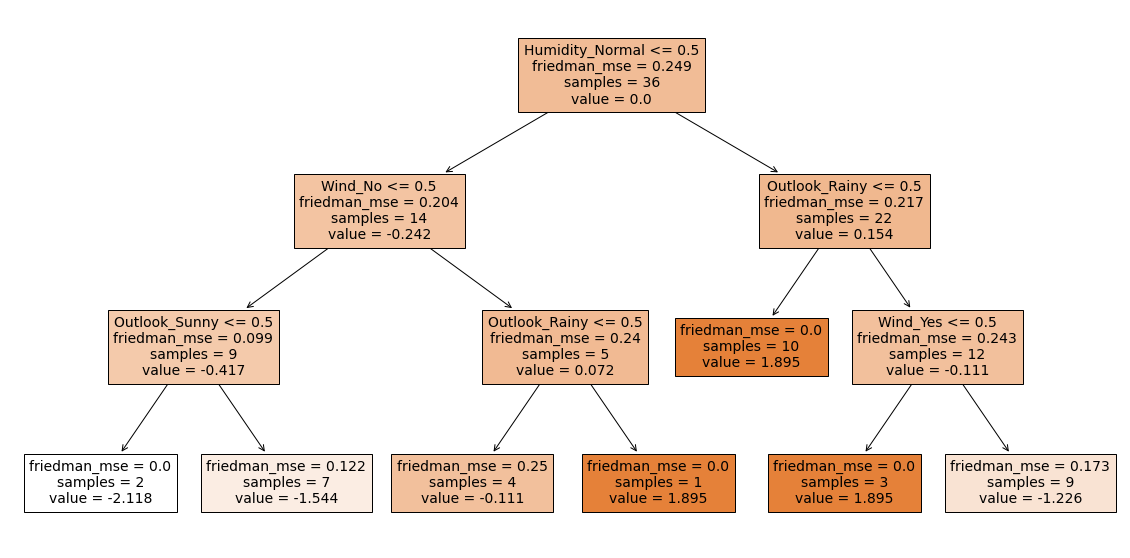

Tree  1 :


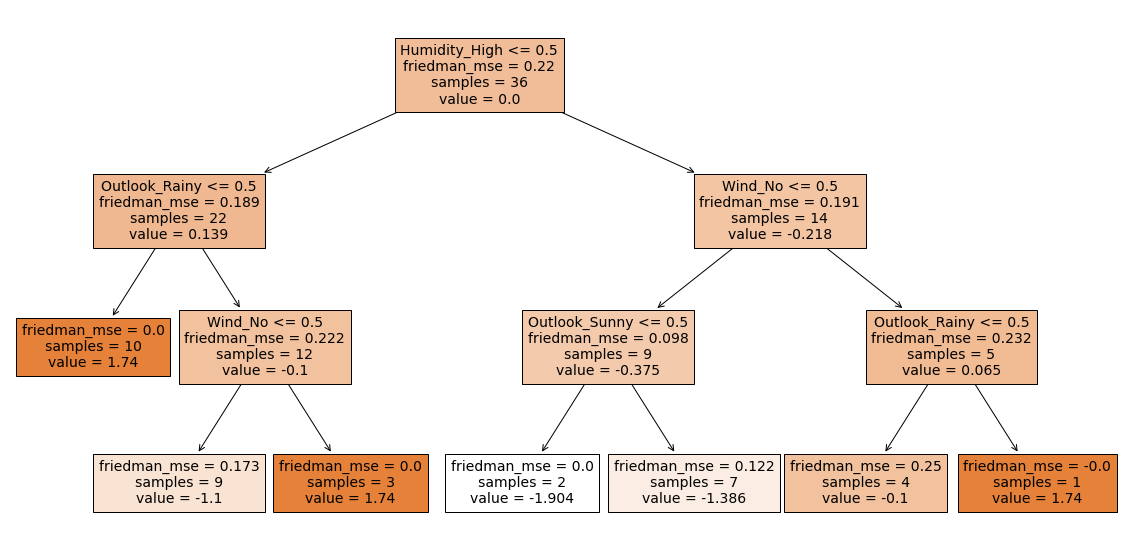

Tree  2 :


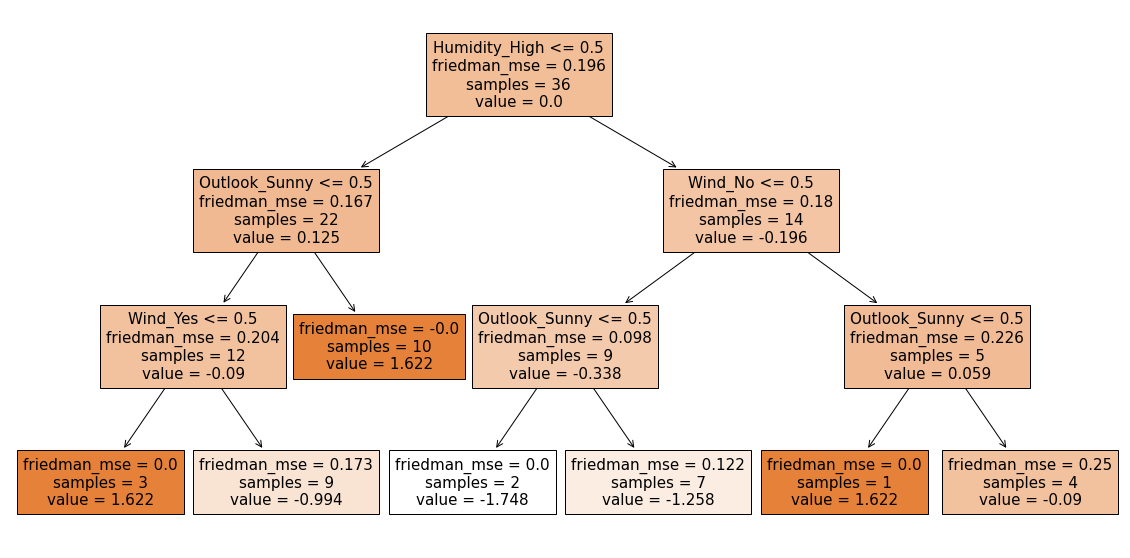

Tree  3 :


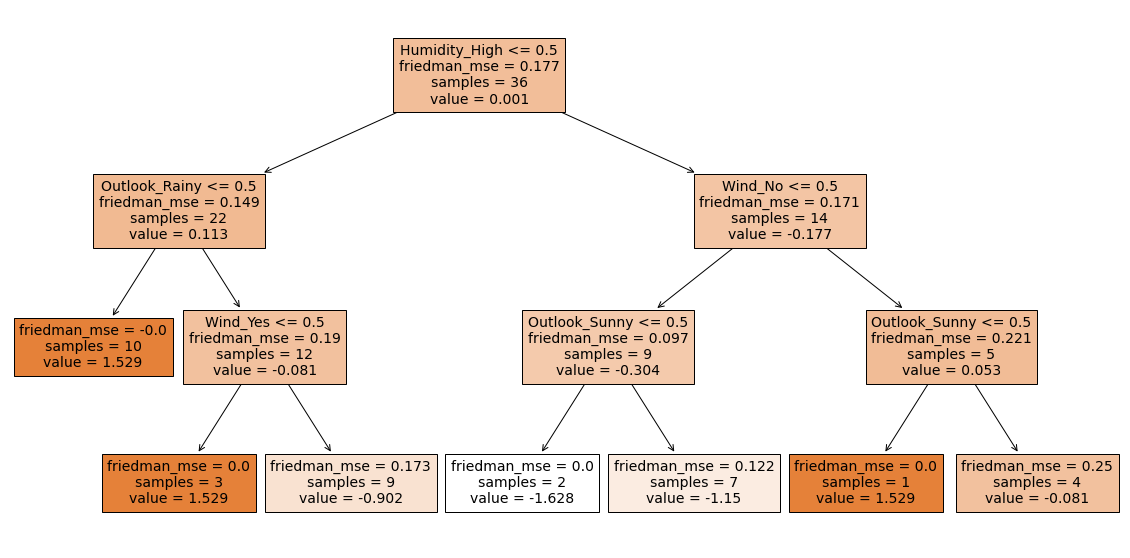

Tree  4 :


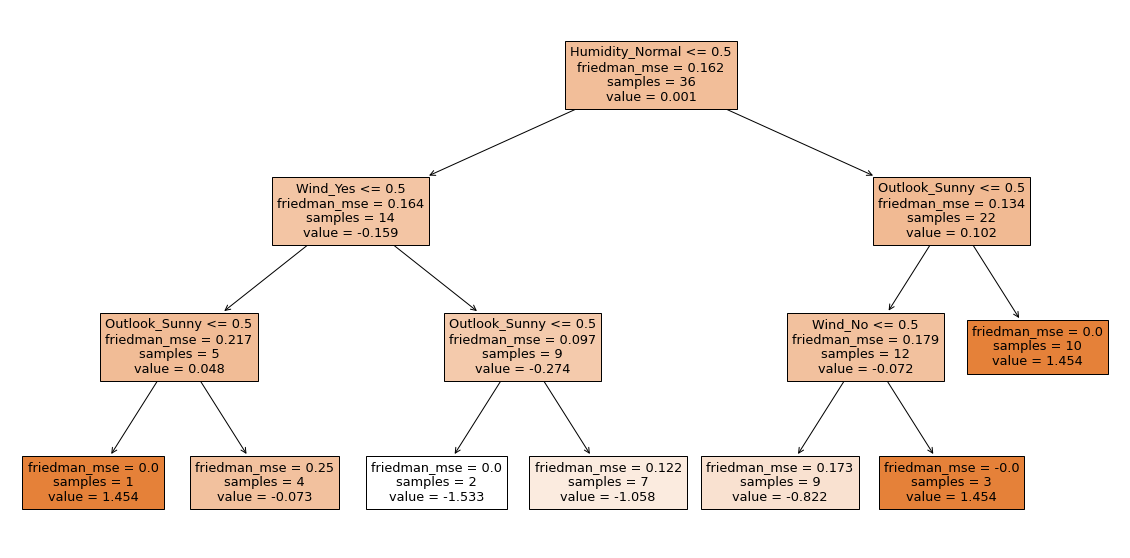

In [21]:
#Plot the decision tree
import matplotlib.pyplot as plt #Library for plot
n_estimators=100
for i in range(5):
    plt.figure(figsize=(20,10))
    tree.plot_tree(clf.estimators_[i,0], feature_names=X.columns, filled=True)
    filename = "Booting-tree-"+str(i)+".pdf"
    plt.savefig(filename,bbox_inches='tight')
    print("Tree ", i,":")
    plt.show()